In [5]:
! pip3 install xgboost

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as matplot 
import seaborn as sns 
import warnings 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve,f1_score 
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
import xgboost as xgb 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve 
warnings.filterwarnings("ignore") 
%matplotlib inline

In [7]:
df = pd.read_csv('HR_comma_sep.csv') 
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation', 
                        'number_project': 'projectCount', 
                        'average_montly_hours': 'averageMonthlyHours', 
                        'time_spend_company': 'yearsAtCompany', 
                        'Work_accident': 'workAccident', 
                        'promotion_last_5years': 'promotion', 
                        'sales' : 'department', 
                        'left' : 'turnover' 
                        })

In [9]:
df.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion', 'department',
       'salary'],
      dtype='object')

In [10]:
round(df.turnover.value_counts(1), 2)

turnover
0    0.76
1    0.24
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

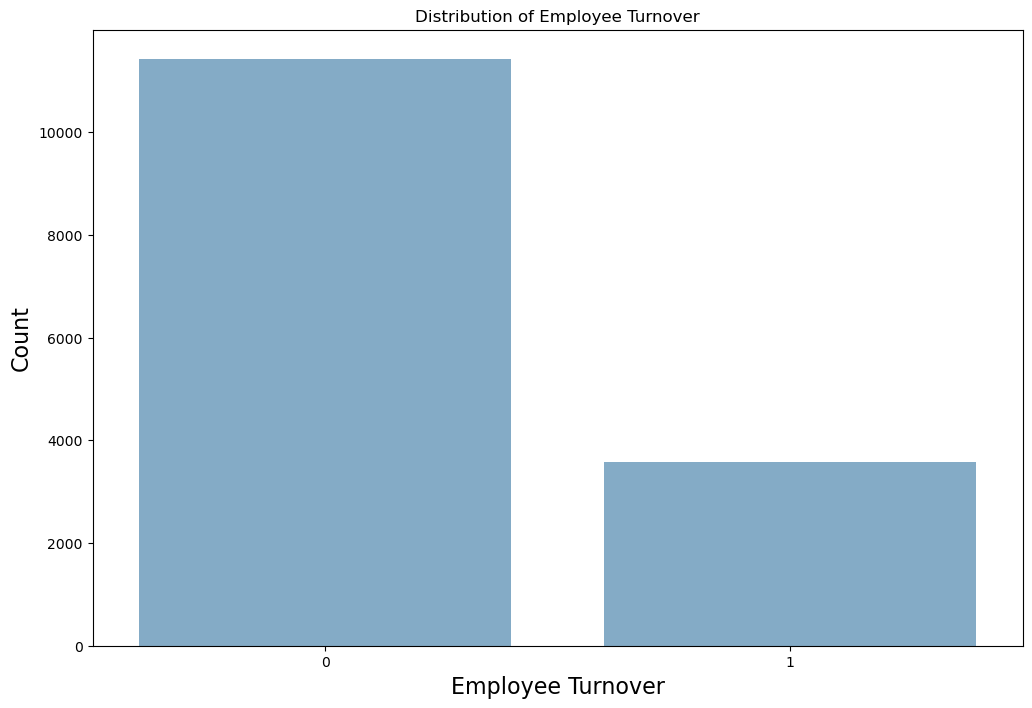

In [12]:
plt.figure(figsize=(12,8)) 
turnover = df.turnover.value_counts() 
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6) 
plt.title('Distribution of Employee Turnover') 
plt.xlabel('Employee Turnover', fontsize=16) 
plt.ylabel('Count', fontsize=16) 


In [13]:
df.isnull().any()

satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
turnover               False
promotion              False
department             False
salary                 False
dtype: bool

In [14]:
df.dtypes 

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

In [15]:
round(df.describe(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [16]:
df1 = df.copy() 
df1 = df1.drop(["department","salary"],axis=1) 
corr = df1.corr() 
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

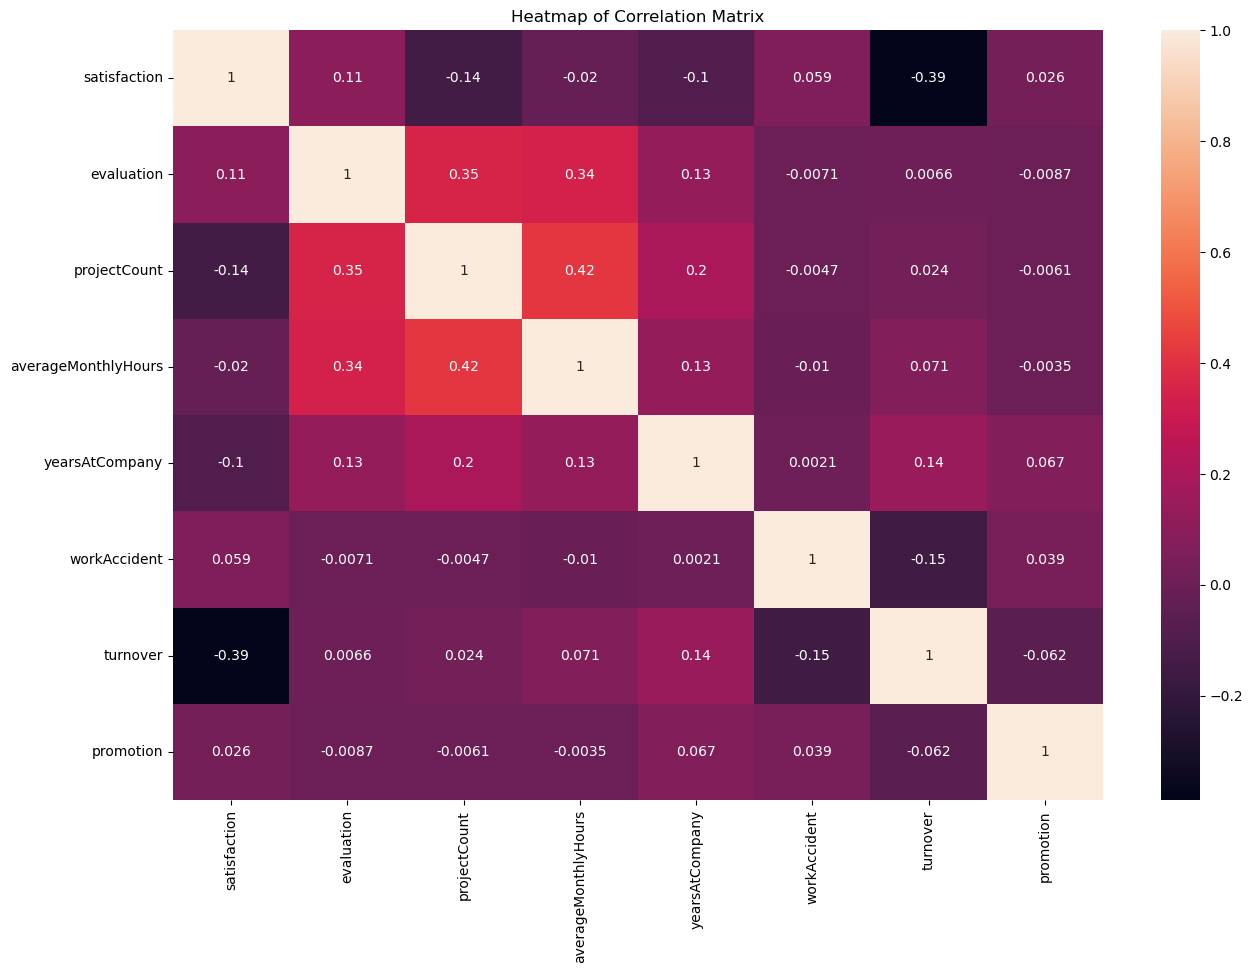

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
annot=True) 
plt.title('Heatmap of Correlation Matrix')

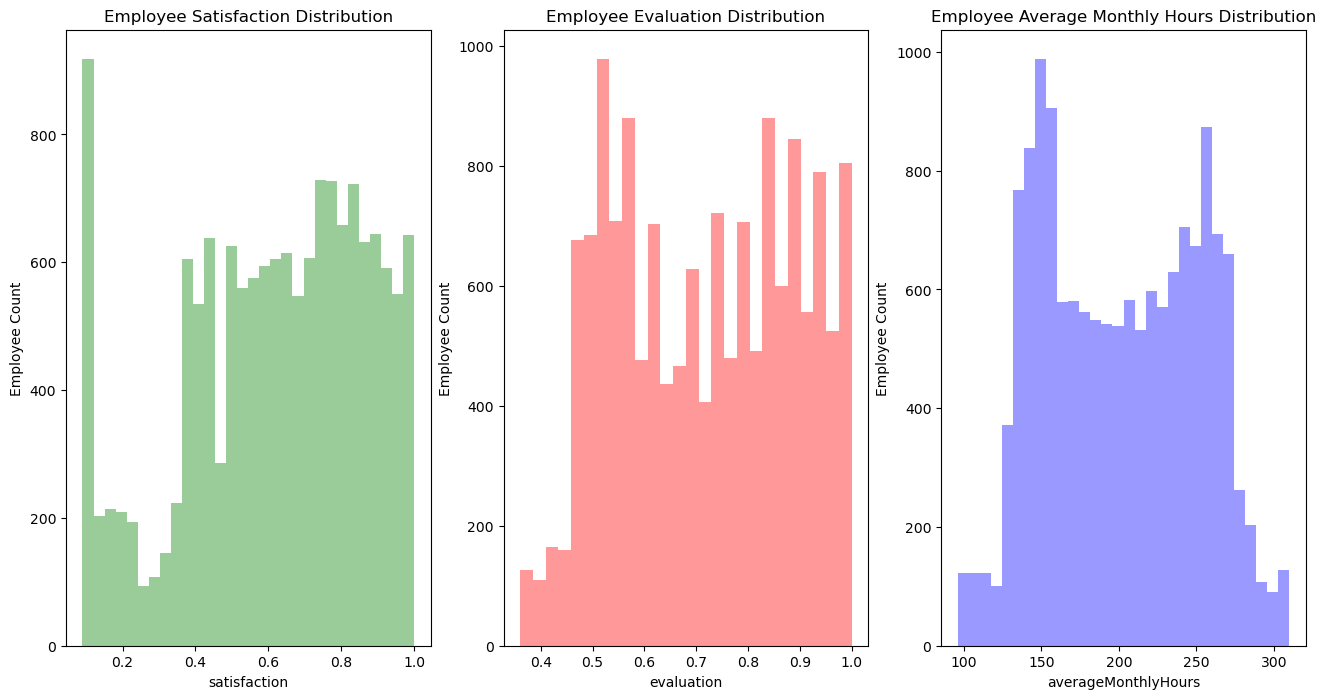

In [21]:
f, axes = plt.subplots(ncols=3, figsize=(16, 8)) 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution') 
axes[0].set_ylabel('Employee Count'); 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution') 
axes[1].set_ylabel('Employee Count'); 
sns.distplot(df.averageMonthlyHours, kde=False, color="b", 
ax=axes[2]).set_title('Employee Average Monthly Hours Distribution') 
axes[2].set_ylabel('Employee Count'); 


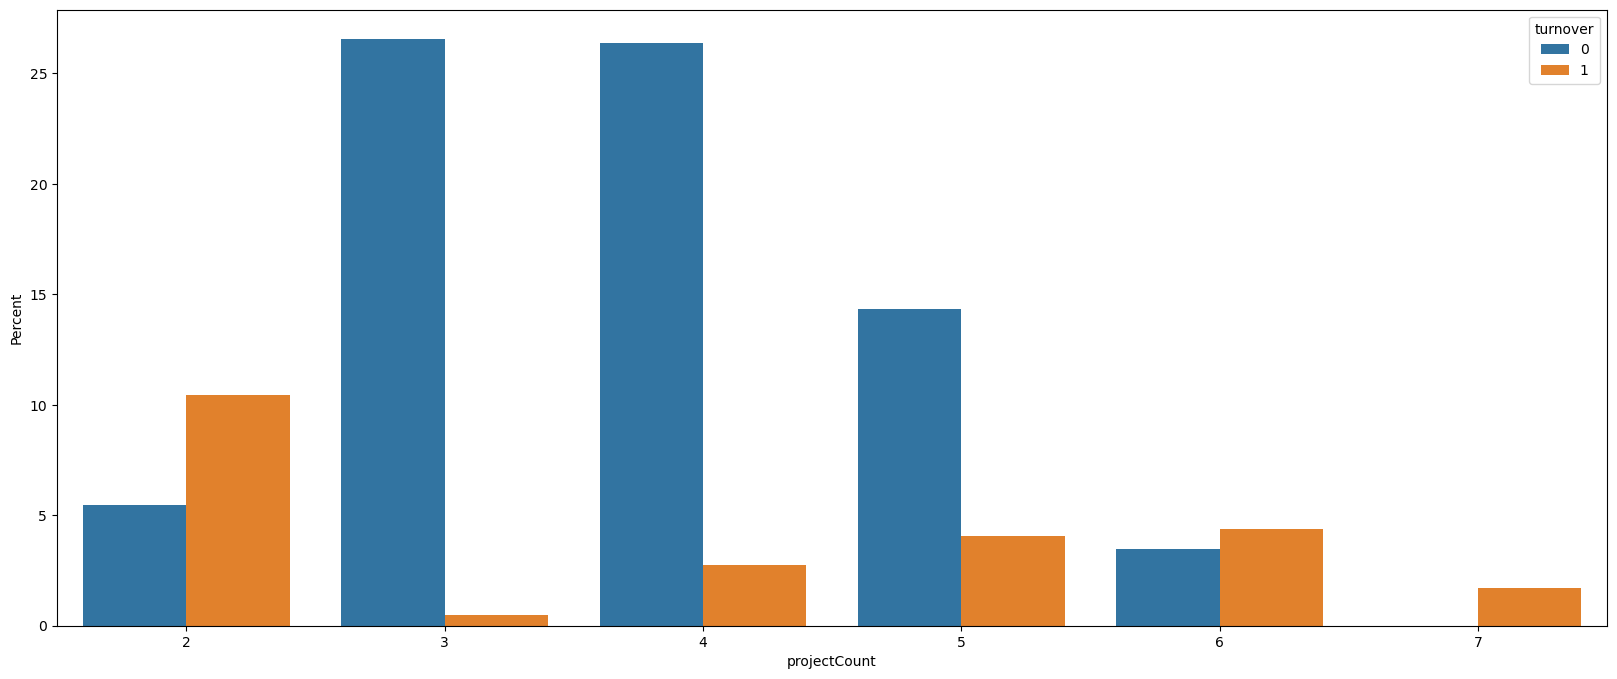

In [22]:
plt.figure(figsize=(20,8)) 
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, 
estimator=lambda x: len(x) / len(df) * 100) 
ax.set(ylabel="Percent"); 

#### Pre-processing

In [25]:
cat_var = ['department','salary','turnover','promotion'] 
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident'] 
categorical_df = pd.get_dummies(df[cat_var], drop_first=True, dummy_na=True) 
numerical_df = df[num_var] 
new_df = pd.concat([categorical_df,numerical_df], axis=1) 
new_df.head() 

,turnover,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.38,0.53,2,157,3,0
1,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.80,0.86,5,262,6,0
2,1,0,False,False,False,False,False,False,True,False,...,False,False,True,False,0.11,0.88,7,272,4,0
3,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.72,0.87,5,223,5,0
4,1,0,False,False,False,False,False,False,True,False,...,False,True,False,False,0.37,0.52,2,159,3,0


### Split Train/Test Set

In [27]:
X = new_df.iloc[:,1:] 
y = new_df.iloc[:,0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
random_state=123, stratify=y) 
print(X_train.shape) 
print(X_test.shape) 

(11999, 20)
(3000, 20)


### Class Imbalance

In [28]:
round(df.turnover.value_counts(1), 2)

turnover
0    0.76
1    0.24
Name: proportion, dtype: float64

Employee Turnover Rate: 24%

# Treat Imbalanced Datasets

In [29]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0) 
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train) 

## Model Training and Performance 

Logistic Regression Classifier

In [30]:
lr = LogisticRegression() 
lr = lr.fit(x_train_sm, y_train_sm) 
lr 
y_pred_lr = lr.predict(X_test) 
print ("\n\n ---Logistic Regression Model---") 
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.50      0.75      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



In [31]:
cm = confusion_matrix(y_test, y_pred_lr) 
print("Confusion Matrix:") 
print(cm)

Confusion Matrix:
[[1758  528]
 [ 177  537]]


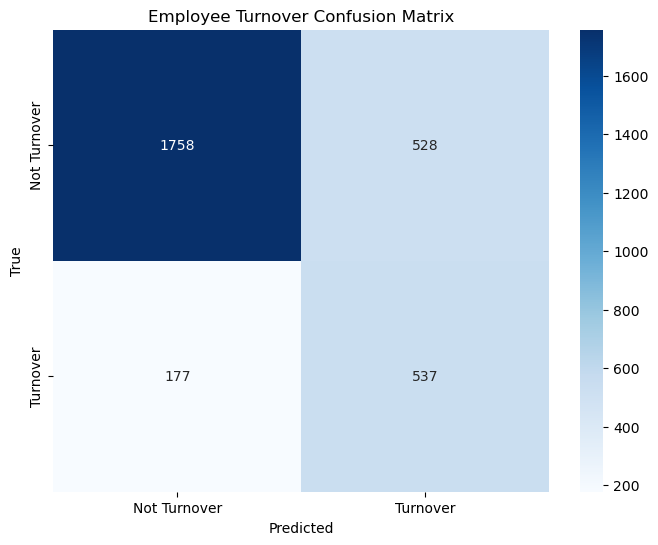

In [33]:
class_labels = ['Not Turnover', 'Turnover'] 
 
# Plot confusion matrix 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 

Random Forest Classifier 

In [34]:
rf = RandomForestClassifier() 
rf = rf.fit(x_train_sm, y_train_sm) 
rf 
y_pred_rf= rf.predict(X_test) 
print ("\n\n ---Random Forest Model---") 
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [35]:
cm = confusion_matrix(y_test, y_pred_rf) 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[2268   18]
 [  16  698]]


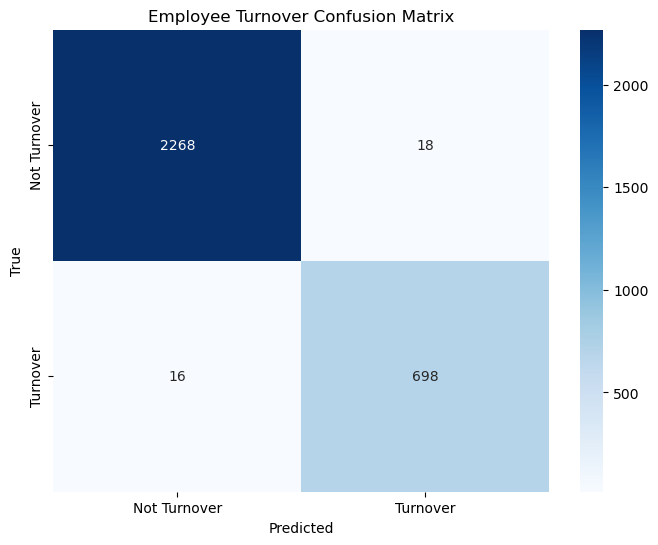

In [36]:
class_labels = ['Not Turnover', 'Turnover'] 
 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 


Gradient Boosting Classifier 

In [37]:
gbc = GradientBoostingClassifier() 
gbc = gbc.fit(x_train_sm,y_train_sm) 
gbc 
y_pred_gbc = gbc.predict(X_test) 
print ("\n\n ---Gradient Boosting Model---") 
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.97      0.97      3000



In [38]:
cm = confusion_matrix(y_test, y_pred_gbc) 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[2229   57]
 [  45  669]]


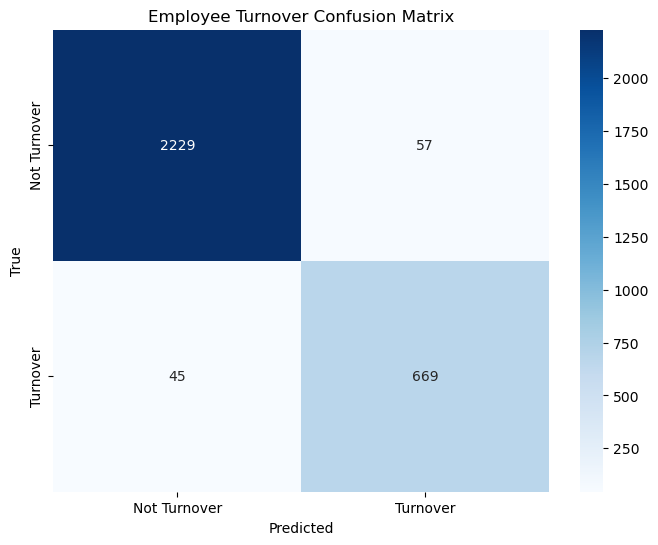

In [39]:
class_labels = ['Not Turnover', 'Turnover'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 

Decision Tree Classifier 

In [40]:
Dt = DecisionTreeClassifier() 
Dt = Dt.fit(x_train_sm,y_train_sm) 
Dt 
y_pred_Dt = Dt.predict(X_test) 
print ("\n\n ---Decision Tree Model---") 
print(classification_report(y_test, Dt.predict(X_test))) 




 ---Decision Tree Model---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2286
           1       0.92      0.98      0.95       714

    accuracy                           0.98      3000
   macro avg       0.96      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [41]:
cm = confusion_matrix(y_test, y_pred_Dt) 
 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[2228   58]
 [  14  700]]


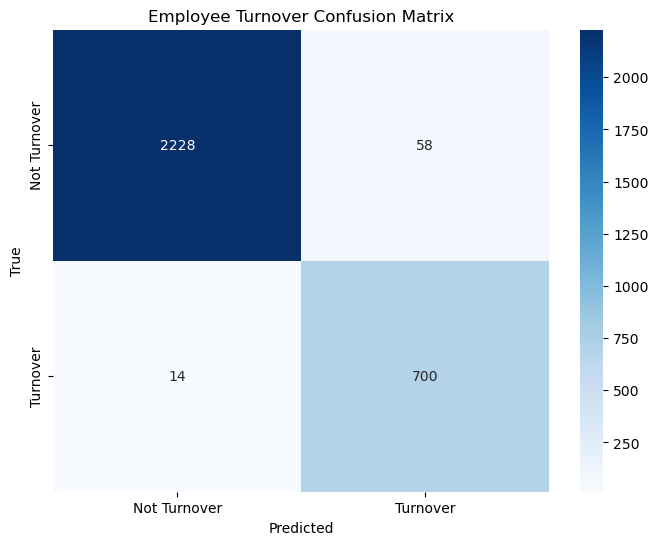

In [42]:
class_labels = ['Not Turnover', 'Turnover'] 
 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 


Gaussian Naive Bayes 

In [43]:
gnb = GaussianNB() 
gnb.fit(x_train_sm, y_train_sm) 
gnb 
y_pred_gnb = gnb.predict(X_test) 
print ("\n\n ---Gaussian Naive Bayes Model---") 
print(classification_report(y_test, gnb.predict(X_test)))



 ---Gaussian Naive Bayes Model---
              precision    recall  f1-score   support

           0       0.92      0.45      0.61      2286
           1       0.33      0.88      0.48       714

    accuracy                           0.56      3000
   macro avg       0.63      0.67      0.55      3000
weighted avg       0.78      0.56      0.58      3000



In [44]:
cm = confusion_matrix(y_test, y_pred_gnb) 
 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[1037 1249]
 [  86  628]]


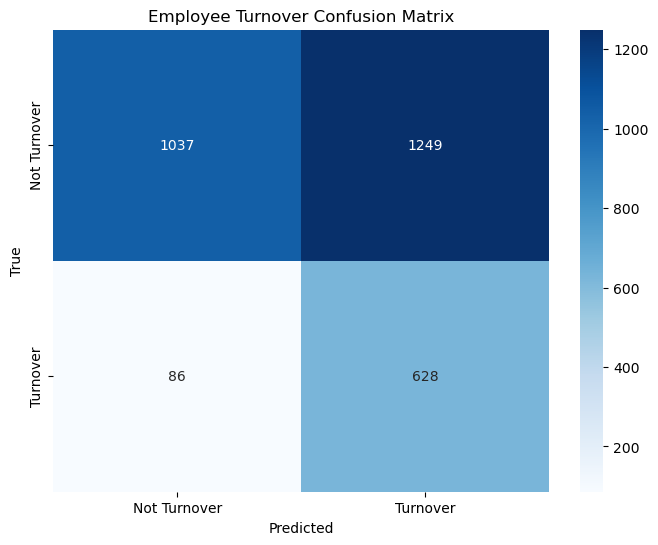

In [45]:
class_labels = ['Not Turnover', 'Turnover'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 

K-Nearest Neighbors Classifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train_sm, y_train_sm) 
knn 
y_pred_knn = knn.predict(X_test) 
print ("\n\n ---KNeighborsClassifier Model---") 
print(classification_report(y_test, knn.predict(X_test)))



 ---KNeighborsClassifier Model---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2286
           1       0.78      0.97      0.86       714

    accuracy                           0.93      3000
   macro avg       0.88      0.94      0.91      3000
weighted avg       0.94      0.93      0.93      3000



In [47]:
cm = confusion_matrix(y_test, y_pred_knn) 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[2091  195]
 [  22  692]]


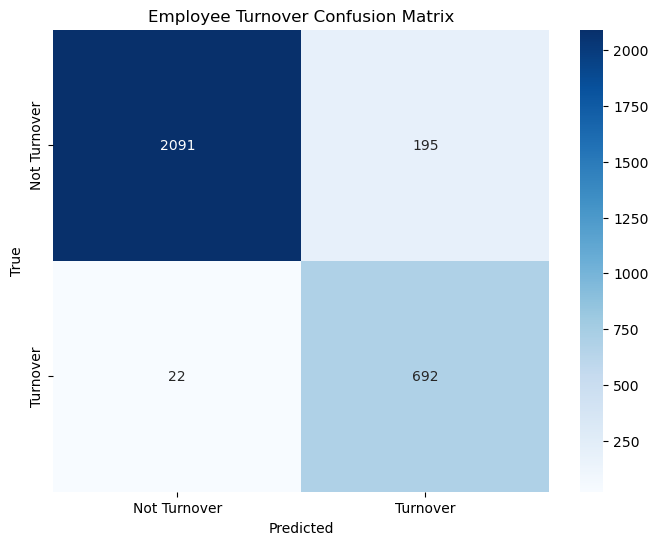

In [48]:
class_labels = ['Not Turnover', 'Turnover'] 
 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 


XGBoost Classifier 

In [49]:
xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100) 
 
xgb.fit(x_train_sm, y_train_sm) 
 
y_pred_xgb = xgb.predict(X_test) 
 
print("\n\n---XGBoost Model---") 
print(classification_report(y_test, y_pred_xgb))



---XGBoost Model---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.95      0.97      0.96       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [50]:
cm = confusion_matrix(y_test, y_pred_xgb) 
print("Confusion Matrix:") 
print(cm) 

Confusion Matrix:
[[2253   33]
 [  21  693]]


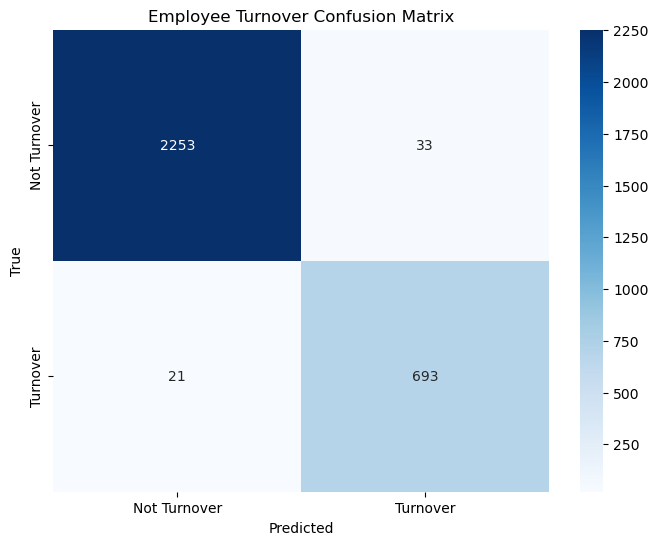

In [51]:
class_labels = ['Not Turnover', 'Turnover'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, 
yticklabels=class_labels) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Employee Turnover Confusion Matrix') 
plt.show() 

## ROC Graph 

In [53]:
lr_auc = roc_auc_score(y_test, lr.predict(X_test)) 
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test)) 
rf_auc = roc_auc_score(y_test, rf.predict(X_test)) 
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test)) 
gnb_auc = roc_auc_score(y_test, gnb.predict(X_test)) 
dtree_auc = roc_auc_score(y_test, Dt.predict(X_test)) 
knn_auc = roc_auc_score(y_test, knn.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1]) 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) 
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1]) 
xgb_fpr,xgb_tpr,xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1]) 
gnb_fpr,gnb_tpr,gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1]) 
dt_fpr,dt_tpr,dt_thresholds = roc_curve(y_test, Dt.predict_proba(X_test)[:,1]) 
knn_fpr,knn_tpr,knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1]) 
colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'Brown'] 


ROC Graph - Logistic Regression 

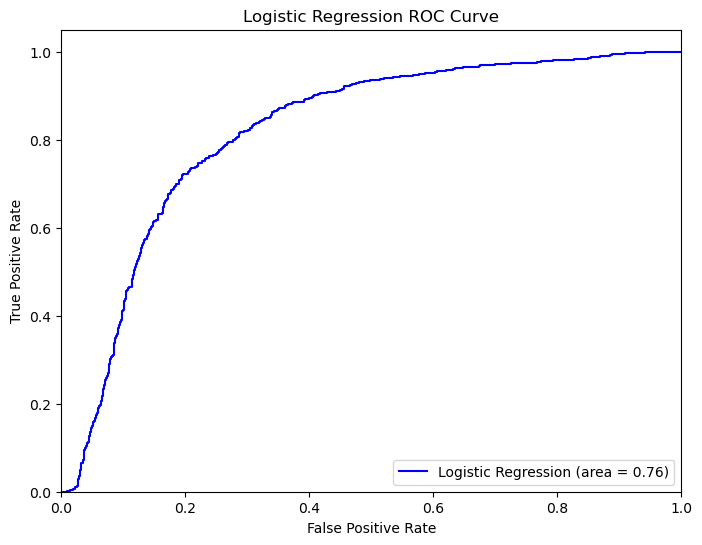

In [54]:
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr,color=colors[0], label='Logistic Regression (area = %0.2f)' % lr_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 

ROC Graph - Random Forest

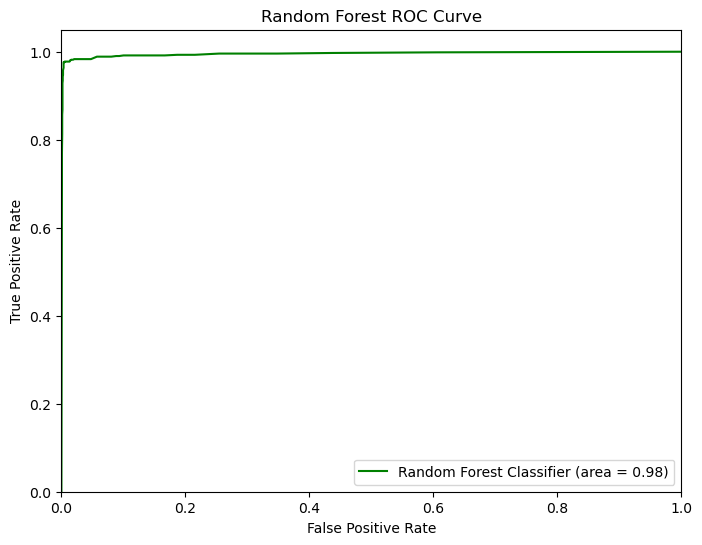

In [55]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1]) 
plt.figure(figsize=(8,6)) 
plt.plot(rf_fpr, rf_tpr,color=colors[1], label='Random Forest Classifier (area = %0.2f)' % rf_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Random Forest ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 


ROC Graph - Gradient Boosting Classifier

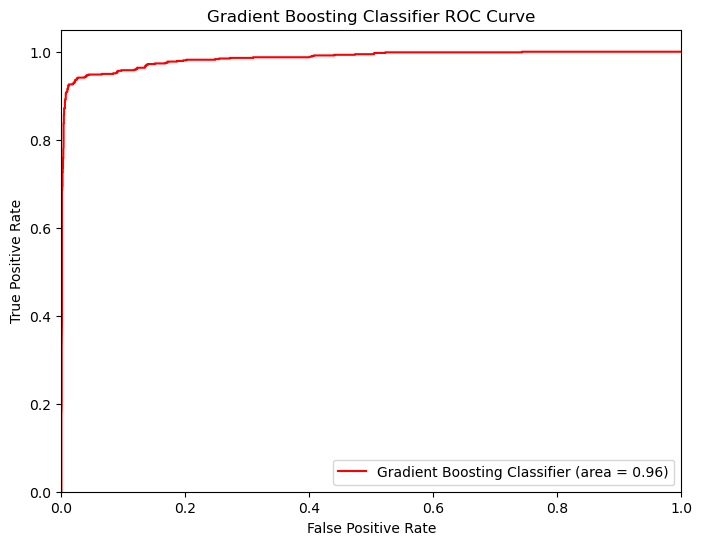

In [57]:
plt.figure(figsize=(8,6)) 
plt.plot(gbc_fpr, gbc_tpr,color=colors[2], label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Gradient Boosting Classifier ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 


ROC Graph - XGBoost Classifier 

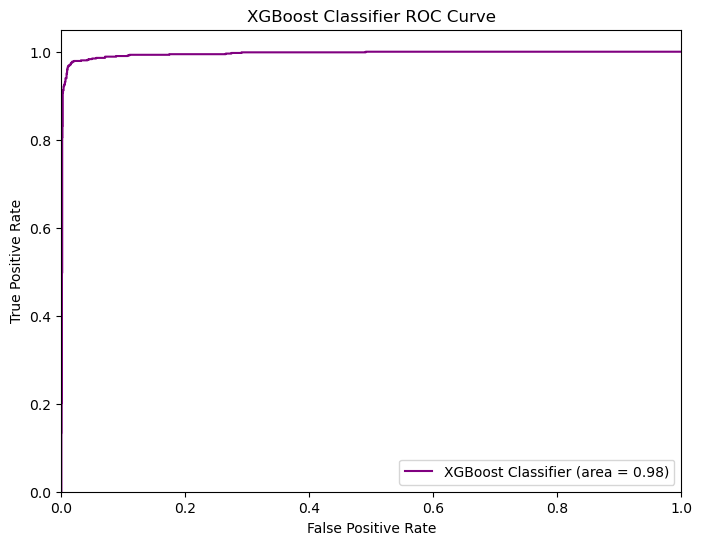

In [58]:
plt.figure(figsize=(8,6)) 
plt.plot(xgb_fpr,xgb_tpr,color=colors[3], label='XGBoost Classifier (area = %0.2f)' % xgb_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('XGBoost Classifier ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 


ROC Graph - k-Nearest Neighbors 

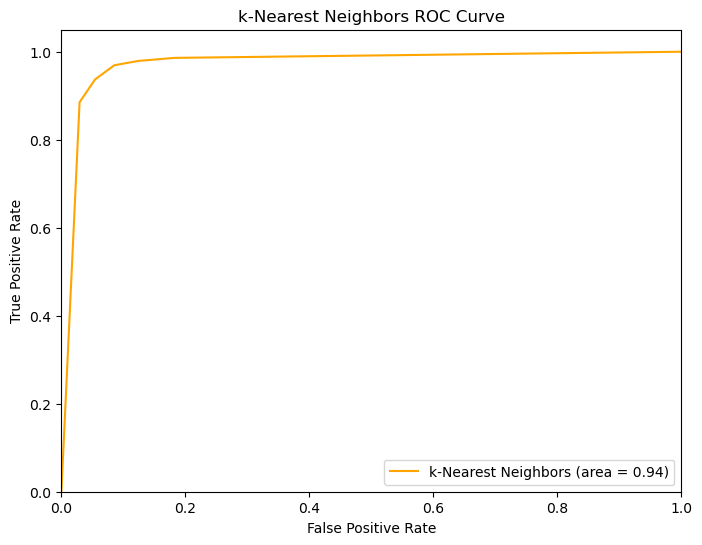

In [59]:
plt.figure(figsize=(8,6)) 
plt.plot(knn_fpr,knn_tpr,color=colors[4], label='k-Nearest Neighbors (area = %0.2f)' % knn_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('k-Nearest Neighbors ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 


ROC Graph - Gaussian Naive Bayes

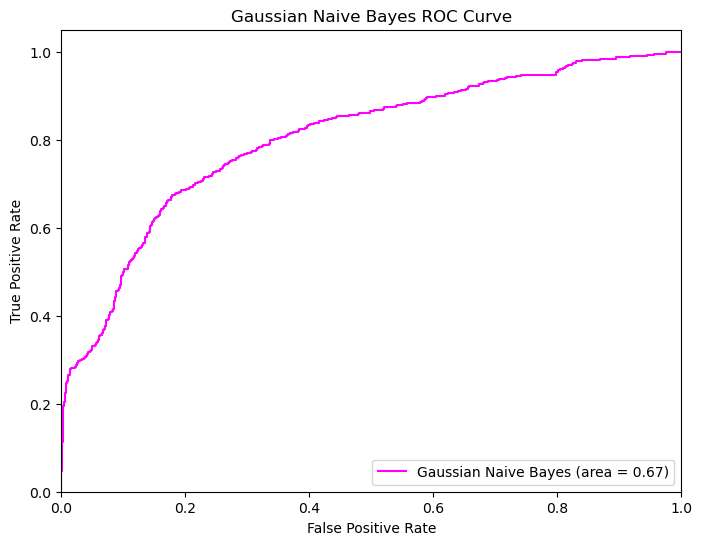

In [60]:
plt.figure(figsize=(8,6)) 
plt.plot(gnb_fpr,gnb_tpr,color=colors[5], label='Gaussian Naive Bayes (area = %0.2f)' % gnb_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Gaussian Naive Bayes ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

ROC Graph - Decision Tree 

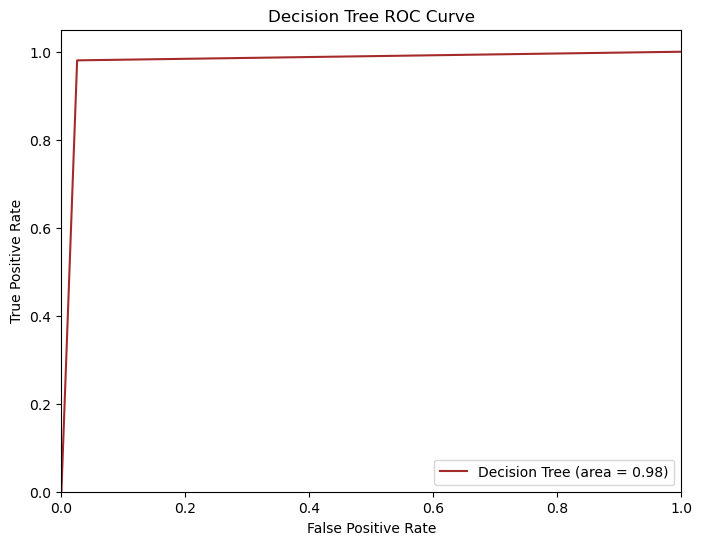

In [61]:
plt.figure(figsize=(8,6)) 
plt.plot(dt_fpr,dt_tpr,color=colors[6],label='Decision Tree (area = %0.2f)' % 
dtree_auc) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Decision Tree ROC Curve') 
plt.legend(loc="lower right") 
plt.show() 


## Feature Importance

In [62]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = x_train_sm.columns, 
                                    
columns=['importance']).sort_values('importance', ascending=False) 
 
feature_importances = feature_importances.reset_index() 
feature_importances = feature_importances[:-2] 
feature_importances 

,index,importance
0,satisfaction,0.286530
1,yearsAtCompany,0.234927
2,averageMonthlyHours,0.148024
3,projectCount,0.132975
4,evaluation,0.122773
5,workAccident,0.020266
6,salary_low,0.013108
7,salary_medium,0.008393
8,department_technical,0.006875
9,department_sales,0.005967


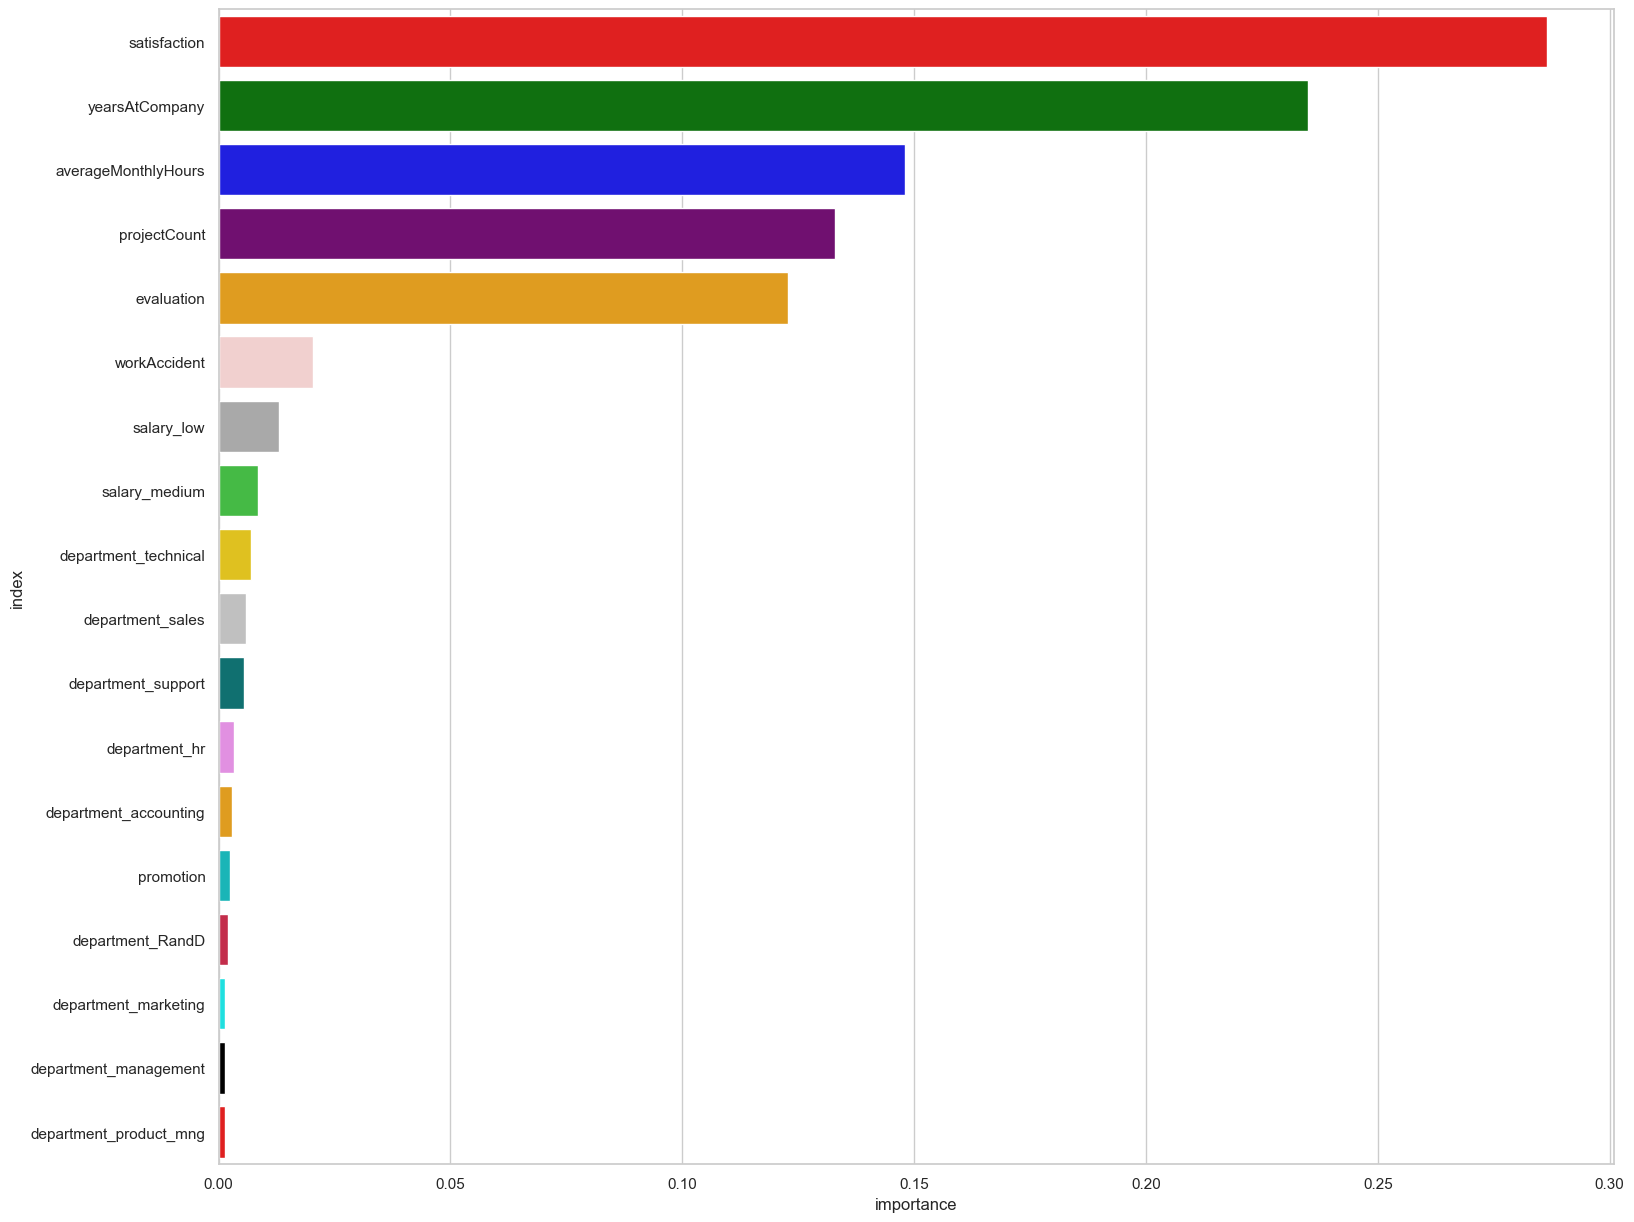

In [63]:
colors = [ 
    "red", 
    "green", 
    "blue", 
"purple", 
"orange", 
"#F7CAC9",  # Light salmon pink 
"#A9A9A9",  # Dark gray 
"#32CD32",  # Lime green 
"#FFD700",  # Gold 
"#C0C0C0",  # Silver 
"teal", 
"#EE82EE",  # Violet 
"#FFA500",  # Orange red 
"#00CED1",  # Dark turquoise 
"#DC143C",  # Crimson 
"#00FFFF",  # Cyan 
"#000000"  # Black 
] 
sns.set(style="whitegrid") 
f, ax = plt.subplots(figsize=(18, 15)) 
sns.set_color_codes("pastel") 
sns.barplot(x="importance", y='index', data=feature_importances, 
label="Total", palette = colors); 

In [67]:
model_results = {} 
models = [lr, rf, gbc, xgb, knn, gnb, Dt] 
metrics = ["accuracy", "precision", "recall", "f1-score", "roc_auc"] 
for model, name in zip(models, ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost", "KNN", "Naive Bayes", "Decision Tree"]): 
  
  y_pred = model.predict(X_test) 
 
  model_results[name] = { 
      "accuracy": accuracy_score(y_test, y_pred), 
      "precision": precision_score(y_test, y_pred), 
      "recall": recall_score(y_test, y_pred), 
      "f1-score": f1_score(y_test, y_pred), 
      "roc_auc": roc_auc_score(y_test, y_pred) 
  } 
 
print("Model Comparison Table:") 
print("{:<25} | {:<10} | {:<10} | {:<10} | {:<10} | {:<10} |".format(*("Algorithm", *metrics))) 
print("-" * 100) 
for name, results in model_results.items(): 
  print("{:<25} | {:<10.2f} | {:<10.2f} | {:<10.2f} | {:<10.2f} | {:<10.2f} |".format(name, *results.values())) 

Model Comparison Table:
Algorithm                 | accuracy   | precision  | recall     | f1-score   | roc_auc    |
----------------------------------------------------------------------------------------------------
Logistic Regression       | 0.77       | 0.50       | 0.75       | 0.60       | 0.76       |
Random Forest             | 0.99       | 0.97       | 0.98       | 0.98       | 0.98       |
Gradient Boosting         | 0.97       | 0.92       | 0.94       | 0.93       | 0.96       |
XGBoost                   | 0.98       | 0.95       | 0.97       | 0.96       | 0.98       |
KNN                       | 0.93       | 0.78       | 0.97       | 0.86       | 0.94       |
Naive Bayes               | 0.56       | 0.33       | 0.88       | 0.48       | 0.67       |
Decision Tree             | 0.98       | 0.92       | 0.98       | 0.95       | 0.98       |
